# US Accidents Analysis

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data Set, Inspect & Clean the Data

In [29]:
# Import CSV
us_acccidents_raw = pd.read_csv('./archive/US_Accidents_Dec20_Updated.csv')

In [30]:
# Create Copy of Raw Data Frame
us_acccidents = us_acccidents_raw

In [31]:
us_acccidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [32]:
us_acccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [33]:
us_acccidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [34]:
numerics = ['int64', 'float64']

us_acccidents_numerics = us_acccidents.select_dtypes(include=numerics)

In [35]:
len(us_acccidents_numerics.columns)

14

## Find and Remove Missing Values

In [36]:
# Find Number of Missing Values Within Each Column
us_acccidents.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [37]:
# Percentage of Missing Values within Each Column in Decending Order
percentage_missing = us_acccidents.isna().sum().sort_values(ascending = False) / len(us_acccidents)
percentage_missing[percentage_missing != 0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
City                     0.000037
dtype: float64

<AxesSubplot:>

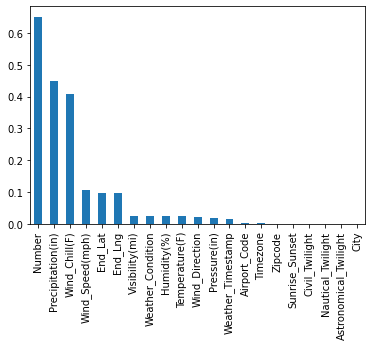

In [38]:
# Bar Chart to Help Visulaise the Distribution of Missing Values
percentage_missing[percentage_missing != 0].plot(kind = 'bar')

In [39]:
# Drop Any Rows Which Contain Missing Values
us_acccidents = us_acccidents.dropna(axis = 0, how = 'any')

## What is the Distribution of Number of Accidents vs Temperature?

[(73.0, 12045), (63.0, 11471), (75.0, 11359), (64.0, 11306), (72.0, 11224), (70.0, 11167), (68.0, 10917), (77.0, 10781), (61.0, 10713), (57.0, 10635), (54.0, 10499), (50.0, 10425), (66.0, 10309), (55.0, 10308), (79.0, 10289), (59.0, 9902), (52.0, 9787), (74.0, 9413), (46.0, 9382), (76.0, 9375), (45.0, 9356), (81.0, 9038), (48.0, 8712), (78.0, 8669), (67.0, 8646), (69.0, 8645), (71.0, 8578), (65.0, 8431), (82.0, 8397), (62.0, 8383), (43.0, 8294), (60.0, 8070), (58.0, 8008), (53.0, 7998), (80.0, 7958), (56.0, 7831), (41.0, 7268), (51.0, 7218), (47.0, 7188), (49.0, 6841), (44.0, 6699), (37.0, 6658), (84.0, 6601), (83.0, 6596), (39.0, 6593), (42.0, 6078), (86.0, 5834), (36.0, 5707), (40.0, 5449), (34.0, 5443), (88.0, 5330), (32.0, 5279), (85.0, 5269), (87.0, 4961), (38.0, 4698), (33.0, 4125), (35.0, 4034), (30.0, 3903), (90.0, 3843), (89.0, 3701), (31.0, 2986), (91.0, 2983), (28.0, 2943), (27.0, 2562), (29.0, 2364), (93.0, 2064), (92.0, 2021), (25.0, 1940), (26.0, 1713), (23.0, 1446), (94.

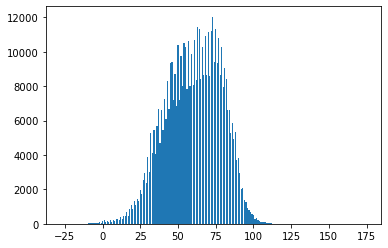

In [58]:
# Round the Temperature Value to the Nearest Integer and Creates a Series
temperature_series = us_acccidents['Temperature(F)'].round()

# Denotes an Empty List and Dictonary
temperature_list = []
temperature_dict = {}

# Transform Series into List
for data in temperature_series:
    temperature_list.append(data)

# Fill Dictonary With Temperature Value as the Key and Number of Occurrences as the Value
for temperature_value in temperature_list:
    temperature_dict[temperature_value] = temperature_dict.get(temperature_value, 0) + 1

# Bar Chart to Help Visualize the Freqency of Accidents Accross the Range of Temperatures
plt.bar(temperature_dict.keys(), temperature_dict.values())

# Sort and Print the Temperature Dictionary by Descending Values
temperature_dict = sorted(temperature_dict.items(), key=lambda x: x[1], reverse=True)
print(temperature_dict)

## In Which Cities do the Most Accidents Occur? 

In [62]:
city_accident = us_acccidents.City.value_counts()
city_accident.head(20)


Miami            17098
Charlotte        14115
Houston          11490
Raleigh           9633
Austin            8998
Los Angeles       8830
Baton Rouge       8049
Orlando           7960
Nashville         6917
Dallas            6633
Oklahoma City     6581
Rochester         5846
Tucson            5613
Phoenix           4821
Greenville        4645
Richmond          4011
Columbia          3257
Portland          3185
Dayton            3026
New Orleans       2986
Name: City, dtype: int64